In [1]:
#import the libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [62]:
df = pd.read_csv(r"C:\\Users\\almostashar\\Desktop\\titanic-passengers.csv",delimiter=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [24]:
import os
os.getcwd()

'C:\\Users\\almostashar'

In [2]:
#knowing the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [38]:
#find the missing values in the dataset 
print(df.isnull().sum())

PassengerId     891
Survived        891
Pclass          891
Name            891
Sex             891
Age            1068
SibSp           891
Parch           891
Ticket          891
Fare            891
Cabin          1578
Embarked        893
title           891
dtype: int64


In [5]:
# knowing the missing values in a specific column
print(df["Cabin"].head())
print(df['Cabin'].head().isnull())

0      NaN
1    F G73
2      NaN
3      NaN
4      B71
Name: Cabin, dtype: object
0     True
1    False
2     True
3     True
4    False
Name: Cabin, dtype: bool


In [14]:
#replacing missing categorical values 
number_of_element=len(df["Cabin"])
print(number_of_element)
print(df["Cabin"].value_counts())
df["Cabin"].fillna("G6",inplace=True)
df.head()

891
G6             691
C23 C25 C27      4
B96 B98          4
E101             3
F33              3
              ... 
E58              1
A16              1
D45              1
D37              1
C99              1
Name: Cabin, Length: 147, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


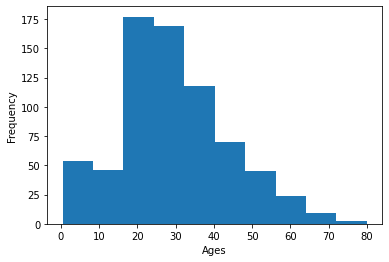

In [25]:
# distribution of the ages 
plt.xlabel ("distribution of ages")
plt.xlabel("Ages")
df["Age"].plot.hist()

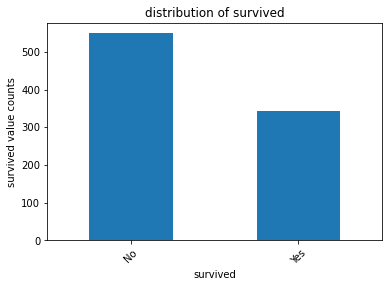

In [27]:
# distribution of the survived 
plt.xlabel("survived")
plt.ylabel("survived value counts")
plt.title("distribution of survived")
vc=df["Survived"].value_counts()
vc.plot.bar(rot=45)

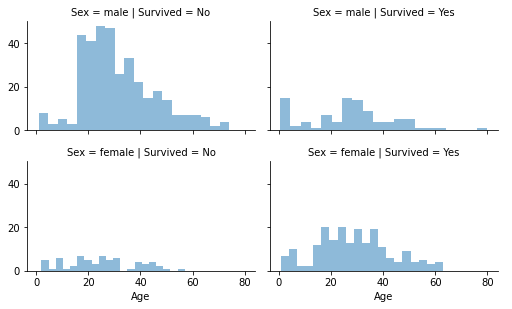

In [4]:
# the correlation between sex and age 
grid = sns.FacetGrid(df, col='Survived', row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

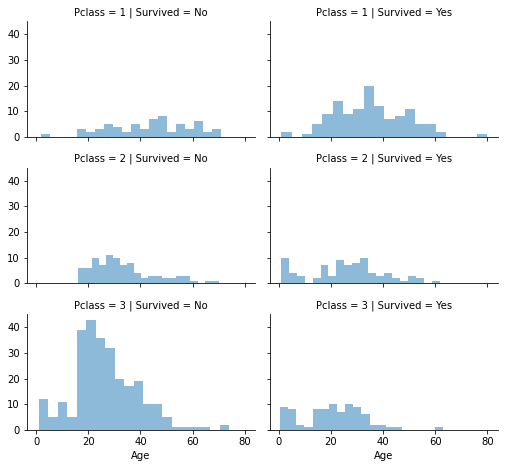

In [5]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [5]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

None


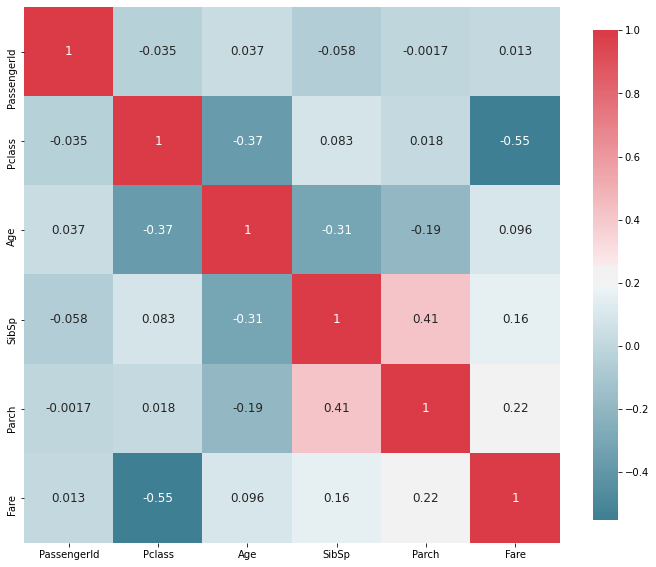

In [6]:
print(plot_correlation_map( df ))

In [8]:
#the impact of the sex on the varibale survived
cleanup={"Survived":{"Yes":1, "No": 0}}  
df.replace(cleanup, inplace=True)
df[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [64]:
l=[]
for i in df["Name"]:
    ti=i.split(", ")
    ti=ti[1].split(".")
    title=ti[0]
    l.append(title)
print(l)

['Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Dr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Major', 'Mrs', 'Don', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Master', 'Dr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Master', 'Miss', 'Mr', 'Rev', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Col', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mrs', 'Mr',

In [65]:
df["title"]=l

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


In [67]:
print(df["title"].head())
print(df['title'].head().isnull())

0     Mr
1     Mr
2     Mr
3    Mrs
4     Mr
Name: title, dtype: object
0    False
1    False
2    False
3    False
4    False
Name: title, dtype: bool


In [68]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64


In [69]:
# dropping the name column 
df=df.drop(["Name"], axis=1 )
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


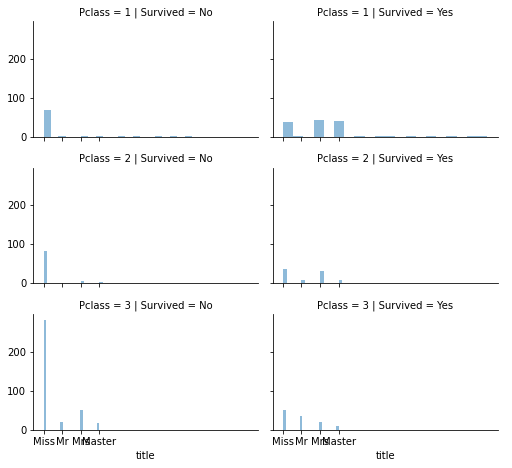

In [70]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'title', alpha=.5, bins=20)
grid.add_legend();

In [88]:

t2=  {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess": "Royalty",

                    "Dona":       "Royalty" ,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master" }




In [89]:
df["title"]=df["title"].map(t2)


In [90]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,Mrs
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,Mrs
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


In [91]:
df["title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

In [94]:
df["family size"]=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family size
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,Mrs,0
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,Mrs,0
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,Mrs,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1
